**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual**

**Problem 14.7**


**The objective of this problem is to calculate the local correlation length for wind velocity and solar radiation. 
We will use the reanalysis dataset ERA5 and weather data corresponding to 2013 that can be downloaded from** https://zenodo.org/record/6382570

**(a) Select one location in Europe (e.g. Paris), identify in which grid cell is located and calculate the distance from the other grid cells.**

**(b) Calculate the Person correlation coefficient from the wind velocity time series and plot the coefficients vs the distance.**

**(c) Fit the data to an exponential curve and determine the correlation length.**

**(d) Repeat sections (b) and (c) using the solar radiation time series.**

We will use the packages [numpy](https://numpy.org/) to operate with arrays and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results

In [20]:
import numpy as np
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import geopy.distance

We load the reanlysis data containing information on wind velocity, solar radiation, latitude and longitude of the grid cells.

In [21]:
nc = Dataset('../../../../../../Desktop/cutout/europe-2013-era5.nc')

We define a data frame that will use to store the calculated results.

In [22]:
data=pd.DataFrame(data=None, 
                  index=None, 
                  columns=['lon', 
                           'lat', 
                           'distance',
                           'rho_wind', 
                           'rho_radiation'], 
                  dtype=float)

Using the latitude and longitude of Paris, the grid cell containing it can be identified.

In [23]:
latitude = 48.86 #Paris
longitude = 2.34
index_lat = np.argmin(np.abs(nc.variables['lat'][:].data-latitude))
index_lon = np.argmin(np.abs(nc.variables['lon'][:].data-longitude))
lon_ref=nc.variables['lon'][index_lon].data
lat_ref=nc.variables['lat'][index_lat].data

The wind velocity and solar radiation in the reference grid cel can be calculated. 

In [24]:
wind_ref=nc.variables['wnd100m'][:,index_lat,index_lon].data
radiation_ref = nc.variables['influx_direct'][:,index_lat,index_lon].data+nc.variables['influx_diffuse'][:,index_lat,index_lon].data

For the remaining grid cells, the distance to the reference, and the correlation coefficient for the wind and solar radiation time series can be calculated and saved in the data frame. (this can take a few minutes)

In [25]:
i_min=max(0,index_lon-75)
i_max=min(len(nc.variables['lon'][:].data),index_lon+75)
j_min=max(0,index_lat-75)
j_max=min(len(nc.variables['lat'][:].data),index_lat+75)
k=0
for i in np.arange(i_min,i_max, 10):        
    for j in np.arange(j_min,j_max, 10):    
        k=k+1
        lon=nc.variables['lon'][i].data
        data.loc[k, 'lon'] = lon
        
        lat=nc.variables['lat'][j].data
        data.loc[k, 'lat'] = lat

        distance = geopy.distance.geodesic((lat,lon), (lat_ref,lon_ref)).km
        data.loc[k, 'distance'] = distance
        
        wind = nc.variables['wnd100m'][:,j,i]
        radiation = nc.variables['influx_direct'][:,j,i].data+nc.variables['influx_diffuse'][:,j,i].data
        data.loc[k,'rho_wind'] = np.corrcoef(wind,wind_ref)[0,1]
        data.loc[k,'rho_radiation'] = np.corrcoef(radiation,radiation_ref)[0,1]


The correlation coefficient for wind time series can be plotted as a function of the distance. 

Text(0.5, 0, 'distance (km)')

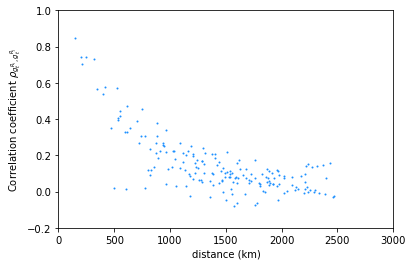

In [26]:
plt.plot(data['distance'],data['rho_wind'],
         marker='.', 
         markersize=2,
         linewidth=0,
         color='dodgerblue')
plt.ylim([-0.2,1])
plt.xlim([0,3000])
plt.ylabel(r'Correlation coefficient $\rho_{g_t^{R_i},g_t^{R_j}}$')
plt.xlabel('distance (km)')

The correlation coefficient can be approach to follow the formula $\rho_{i,j}=exp(\frac{-1}{\xi_c}·d)_{i,j}$ where $\xi_c$ is the correlation length. 
We can check that $\xi_c$ =650km fits nicely the data points for Paris. 

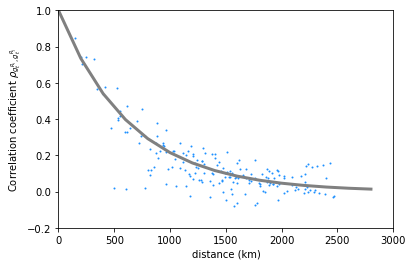

In [27]:
dis=np.arange(0,3000,200)
CL_wind=650
cor_theo_wind=[np.exp(-(1/CL_wind)*d) for d in dis]

plt.plot(data['distance'],data['rho_wind'],
         marker='.', 
         markersize=2,
         linewidth=0,
         color='dodgerblue')
plt.ylim([-0.2,1])
plt.xlim([0,3000])
plt.ylabel(r'Correlation coefficient $\rho_{g_t^{R_i},g_t^{R_j}}$')
plt.xlabel('distance (km)')
plt.plot(dis,cor_theo_wind, 'gray', linewidth=3)

We can plot now the correlation coefficient for solar radiation and show that the correlation length is much larger in this case.

Text(0.5, 0, 'distance (km)')

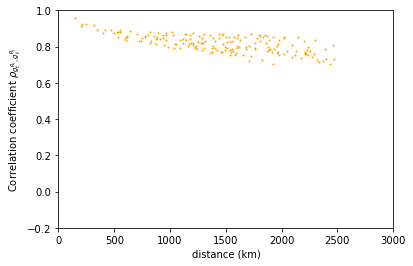

In [28]:
plt.plot(data['distance'],data['rho_radiation'],
         marker='.', 
         markersize=2,
         linewidth=0,
         color='orange')
plt.ylim([-0.2,1])
plt.xlim([0,3000])
plt.ylabel(r'Correlation coefficient $\rho_{g_t^{R_i},g_t^{R_j}}$')
plt.xlabel('distance (km)')